In [1]:
## check availability of GPU (nvidia-smi)
import os
os.environ["CUDA_VISIBLE_DEVICES"]="5"

In [2]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla V100-SXM2-32GB, compute capability 7.0


In [3]:
import warnings
warnings.filterwarnings("ignore")

import os 
import glob

current_dir = "/mnt/akoustos/"

data_dir = current_dir + "Data/"
labeled_data_dir = data_dir + 'Labeled_Data/'
audio_dir = data_dir + "Raw_Audio/"

spectrogram_dir = data_dir + "Extracted_Spectrogram/"
if not os.path.exists(spectrogram_dir):
    os.makedirs(spectrogram_dir)


In [4]:
from src.data_split import Data_Split
categories = ['25', '14', '4949']  ## regard the remaining labeled detections with other labels as "non-category" (i.e., negatives)
data = Data_Split.data_split_multiclass(categories, spectrogram_dir)
print(data.head(10))

   label  Count  Percentage
0  -9999    789       34.45
1     14    500       21.83
2     25    500       21.83
3   4949    501       21.88
Size of train, val, test dataset: 1602 344 344
Percentage of train, val, test dataset: 70.0% 15.0% 15.0%
                                            filename  label  split
0  /mnt/akoustos/Data/Extracted_Spectrogram/proje...     25  train
1  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  -9999  train
2  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  -9999  train
3  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  -9999  train
4  /mnt/akoustos/Data/Extracted_Spectrogram/proje...   4949  train
5  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  -9999    val
6  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  -9999   test
7  /mnt/akoustos/Data/Extracted_Spectrogram/proje...   4949    val
8  /mnt/akoustos/Data/Extracted_Spectrogram/proje...     25  train
9  /mnt/akoustos/Data/Extracted_Spectrogram/proje...     25  train


### Train with a Customized CNN 

Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 169.10194 | Val Loss: 52.56914 | Train Acc: 0.292| Val Acc: 0.326
Epoch 02: | Train Loss: 38.56327 | Val Loss: 10.43587 | Train Acc: 0.446| Val Acc: 0.544
Epoch 03: | Train Loss: 17.37348 | Val Loss: 6.02796 | Train Acc: 0.586| Val Acc: 0.767
Epoch 04: | Train Loss: 10.05928 | Val Loss: 5.35829 | Train Acc: 0.659| Val Acc: 0.666
Epoch 05: | Train Loss: 6.41689 | Val Loss: 5.35724 | Train Acc: 0.677| Val Acc: 0.637
Epoch 06: | Train Loss: 3.07396 | Val Loss: 4.18433 | Train Acc: 0.730| Val Acc: 0.616
Epoch 07: | Train Loss: 3.04995 | Val Loss: 1.16834 | Train Acc: 0.703| Val Acc: 0.799
Epoch 08: | Train Loss: 1.06523 | Val Loss: 0.56769 | Train Acc: 0.760| Val Acc: 0.858
Epoch 09: | Train Loss: 1.36269 | Val Loss: 0.80878 | Train Acc: 0.760|

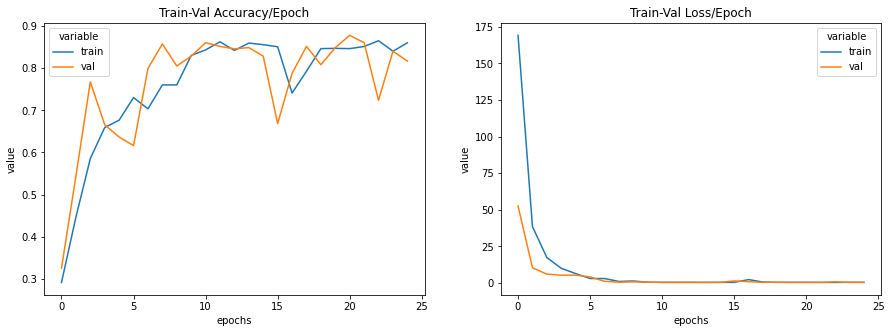

Scoring results on testset:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       103
           1       0.95      0.90      0.92        82
           2       0.85      0.87      0.86        79
           3       0.86      0.85      0.86        80

    accuracy                           0.87       344
   macro avg       0.88      0.87      0.87       344
weighted avg       0.87      0.87      0.87       344

Confusion matrix on testset:
             pred: -9999  pred: 14  pred: 25  pred: 4949
true: -9999           89         2         6           6
true: 14               0        74         3           5
true: 25              10         0        69           0
true: 4949             7         2         3          68


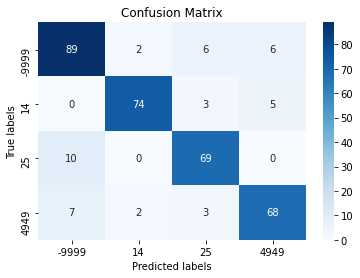

In [5]:
from src.model.multiclass_classification import multiclass_classification_models
model = multiclass_classification_models.train_model(data = data, 
                                                     model_name = 'Customized_CNN', 
                                                     batch_size = 32,  
                                                     optimizer = 'Adam', 
                                                     learning_rate = 0.008, 
                                                     lr_decay = False, 
                                                     num_epochs = 25)


### Fine-tune a pre-trained model

Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 1.20282 | Val Loss: 0.24319 | Train Acc: 0.820| Val Acc: 0.953
Epoch 02: | Train Loss: 0.38074 | Val Loss: 0.19427 | Train Acc: 0.919| Val Acc: 0.953
Epoch 03: | Train Loss: 0.38031 | Val Loss: 0.20857 | Train Acc: 0.918| Val Acc: 0.951
Epoch 04: | Train Loss: 0.40256 | Val Loss: 0.25445 | Train Acc: 0.901| Val Acc: 0.945
Epoch 05: | Train Loss: 0.40566 | Val Loss: 0.21889 | Train Acc: 0.919| Val Acc: 0.953
Epoch 06: | Train Loss: 0.41651 | Val Loss: 0.18895 | Train Acc: 0.909| Val Acc: 0.959
Epoch 07: | Train Loss: 0.40197 | Val Loss: 0.32642 | Train Acc: 0.904| Val Acc: 0.942
Epoch 08: | Train Loss: 0.38821 | Val Loss: 0.25353 | Train Acc: 0.927| Val Acc: 0.945
Epoch 09: | Train Loss: 0.39035 | Val Loss: 0.21901 | Train Acc: 0.916| Val Ac

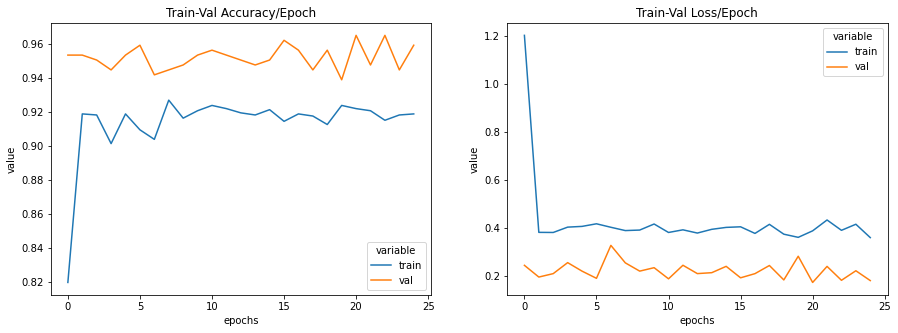

Scoring results on testset:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       110
           1       0.98      0.89      0.93        72
           2       0.96      0.99      0.97        74
           3       0.94      0.95      0.95        88

    accuracy                           0.95       344
   macro avg       0.96      0.95      0.95       344
weighted avg       0.95      0.95      0.95       344

Confusion matrix on testset:
             pred: -9999  pred: 14  pred: 25  pred: 4949
true: -9999          107         0         0           3
true: 14               4        64         2           2
true: 25               1         0        73           0
true: 4949             2         1         1          84


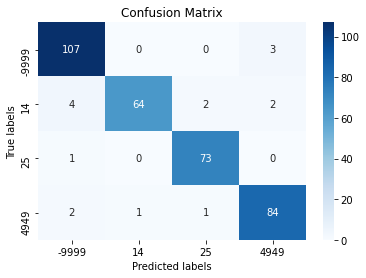

In [6]:
from src.model.multiclass_classification import multiclass_classification_models
model = multiclass_classification_models.train_model(data = data, 
                                                 model_name = 'Resnet18', 
                                                 batch_size = 32, 
                                                 pretrained = True, 
                                                 optimizer = 'Adam', 
                                                 learning_rate = 0.0005, 
                                                 lr_decay = True, 
                                                 num_epochs = 25)
